In [53]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

Para facilitar el analísis estadístico de lo acontecido en el Titanic, se realizó este programa: permite seleccionar, de una lista, un gráfico a generar en función de las variables existentes y pertinentes a dicho tipo de gráfico.

In [54]:
# PREPARAMOS EL DATAFRAME

# Abrimos el archivo
df = pd.read_csv('Titanic.csv', encoding='UTF-8', sep=',')
# Eliminamos las columnas "PassengerId", "Ticket" y "Cabin" porque no las usaremos
df = df.drop(["PassengerId", "Ticket", "Cabin"], axis=1)
# Y queremos que los nombres estén por delante de todo a cambio del ID
new_order = ['Name', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[new_order]
# Reemplazamos los valores en la columna "Sex" por "femenino" y "masculino", y los 1 y 0 de "Supervivencia" por "Sí" y "No"
df['Sex'] = df['Sex'].replace({'female': 'femenino', 'male': 'masculino'})
df['Survived'] = df['Survived'].replace({1: 'Sí', 0: 'No'})
# Renombramos las columnas en español
espanol = {
    'Name': 'Nombre',
    'Survived': 'Supervivencia',
    'Pclass': 'Clase',
    'Sex': 'Género',
    'Age': 'Edad',
    'SibSp': 'N_hermanos_cónyuge',
    'Parch': 'N_padres_hijos',
    'Fare': 'Tarifa',
    'Embarked': 'Embarque'
}
df = df.rename(columns=espanol)

In [55]:
df.head(10)

,Nombre,Supervivencia,Clase,Género,Edad,N_hermanos_cónyuge,N_padres_hijos,Tarifa,Embarque
0,"Braund, Mr. Owen Harris",No,3,masculino,22.0,1,0,7.2500,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Sí,1,femenino,38.0,1,0,71.2833,C
2,"Heikkinen, Miss. Laina",Sí,3,femenino,26.0,0,0,7.9250,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Sí,1,femenino,35.0,1,0,53.1000,S
4,"Allen, Mr. William Henry",No,3,masculino,35.0,0,0,8.0500,S
5,"Moran, Mr. James",No,3,masculino,NaN,0,0,8.4583,Q
6,"McCarthy, Mr. Timothy J",No,1,masculino,54.0,0,0,51.8625,S
7,"Palsson, Master. Gosta Leonard",No,3,masculino,2.0,3,1,21.0750,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Sí,3,femenino,27.0,0,2,11.1333,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",Sí,2,femenino,14.0,1,0,30.0708,C


In [56]:
df.tail(10)

,Nombre,Supervivencia,Clase,Género,Edad,N_hermanos_cónyuge,N_padres_hijos,Tarifa,Embarque
881,"Markun, Mr. Johann",No,3,masculino,33.0,0,0,7.8958,S
882,"Dahlberg, Miss. Gerda Ulrika",No,3,femenino,22.0,0,0,10.5167,S
883,"Banfield, Mr. Frederick James",No,2,masculino,28.0,0,0,10.5000,S
884,"Sutehall, Mr. Henry Jr",No,3,masculino,25.0,0,0,7.0500,S
885,"Rice, Mrs. William (Margaret Norton)",No,3,femenino,39.0,0,5,29.1250,Q
886,"Montvila, Rev. Juozas",No,2,masculino,27.0,0,0,13.0000,S
887,"Graham, Miss. Margaret Edith",Sí,1,femenino,19.0,0,0,30.0000,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",No,3,femenino,NaN,1,2,23.4500,S
889,"Behr, Mr. Karl Howell",Sí,1,masculino,26.0,0,0,30.0000,C
890,"Dooley, Mr. Patrick",No,3,masculino,32.0,0,0,7.7500,Q


A continuación se definen los distintos gráficos (de frecuencia, de torta, de promedio, de diferencia y un grafo que relaciona los apellidos en común con una de tres variables a elegir) que se le ofrecerán al usuario en el menú:

In [57]:
# Funciones para los gráficos de matplot.lib que se le ofrecerán al usuario en el menú

def frecuencia (variable): # Variables pertinentes: Edad, N_hermanos_cónyuge, N_padres_hijos
    plt.hist(df[variable].dropna(), bins=20, color='skyblue')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.title('Distribución de ' + variable + ' de los Pasajeros')
    plt.show()

def grafico_torta(variable): # Variables pertinentes: Supervivencia, Clase, Sexo, Embarque
    cat_counts = df[variable].value_counts()
    plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Distribución de ' + variable + ' de los Pasajeros')
    plt.show()

def promedio(variable): # Variables pertinentes: Tarifa x Clase o Género o Embarque
    promedio_r1_r2 = df.groupby(variable)['Tarifa'].mean()
    promedio_r1_r2.plot(kind='bar')
    plt.xlabel(variable)
    plt.ylabel('Tarifa')
    plt.title('Promedio de Tarifa por ' + variable)
    plt.show()

def diferencia(categoria, a_diferenciar): # Variables pertinentes: Clase x Supervivencia o Género, Embarque x Supervivencia o Género
    survival_by_class = df.groupby(categoria)[a_diferenciar].value_counts().unstack()
    survival_by_class.plot(kind='bar', stacked=True)
    plt.xlabel(categoria)
    plt.ylabel('Cantidad')
    plt.title(a_diferenciar + ' por ' + categoria)
    plt.legend(title=a_diferenciar, labels=['No', 'Sí'])
    plt.show()

In [58]:
# Funciones para los GRAFOS de NetworkX basados en la búsqueda de la expresión literal: apellido, que encuentra a todos los pasajeros
                            # con dicho apellido y los relaciona con la variable elegida de las tres dadas: género, clase o supervivencia

def validar_busqueda(apellido,data_a_validar):
    #Si está vacío, arrojará un excepción. 
    if data_a_validar.empty:
            raise ValueError(f"No se encontraron registros para el apellido {apellido} proporcionado")

def retornar_categoria_elegida(opcion):
    opciones_disponibles = {1:["Sex",["male", "female"]],
                            2:["Pclass",["1", "2", "3"]],
                            3:["Survived",["1", "0"]]
                        }
    
    if opcion in opciones_disponibles.keys():
        return opciones_disponibles[opcion]
    raise ValueError(f"No se encontró la opción{opcion}, intente con un valor válido tales como: {opciones_disponibles.keys()}")
    
def generar_grafo_por_categoria(apellido, data, opcion):
    try:
        #Expresiones regulares para obtener el apellido de las columna Name.
        apellido = "^" + re.escape(apellido.capitalize()) + ".*"
        
        #Filtrar el DataFrame para incluir solo las filas que coinciden con el nombre dado
        data_filtrada = data[data['Name'].str.match(apellido)]

        #validar la busqueda
        validar_busqueda(apellido,data_filtrada)
        
        #validar_opcion. Retorna la categoria a buscar.(unpacking)
        categoria, valores_categoria = retornar_categoria_elegida(opcion)
        
        #Crear un grafo dirigido
        DG = nx.DiGraph()
        
        #Agregar nodos y bordes al grafo
        for i in range(0, len(data_filtrada)):
            DG.add_edge(data_filtrada.iloc[i]['Name'], data_filtrada.iloc[i][categoria])
        
        #Definir colores para los nodos
        
        color_nodos = ['red' if node in valores_categoria else 'lightblue' for node in DG.nodes()]
        
        #Dibujar grafo
        fig, ax = plt.subplots(figsize = (20,20))
        
        nx.draw(DG, with_labels=True, node_size = 1500,node_color= color_nodos)
        plt.show()
    
    except Exception as e:
        print(f"Error:{e}")

Menú para el usuario en el que se le pide ingresar un número por cada opción que elija del menú o submenú correspondiente:
1. Generar un gráfico de frecuencia
    1. Edad
    2. Hermanos/cónyuges
    3. Padres/hijos
2. Generar un gráfico de torta
    1. Supervivencia
    2. Clase
    3. Género
    4. Embarque
3. Generar el promedio de la Tarifa por una variable
    1. Clase
    2. Género
    3. Embarque
4. Generar una diferencia
    1. Clase
        1. Supervivencia
        2. Género
    2. Embarque
        1. Supervivencia
        2. Género
5. Generar un grafo en base a un apellido
    1. Género
    2. Clase
    3. Supervivencia

0 para SALIR


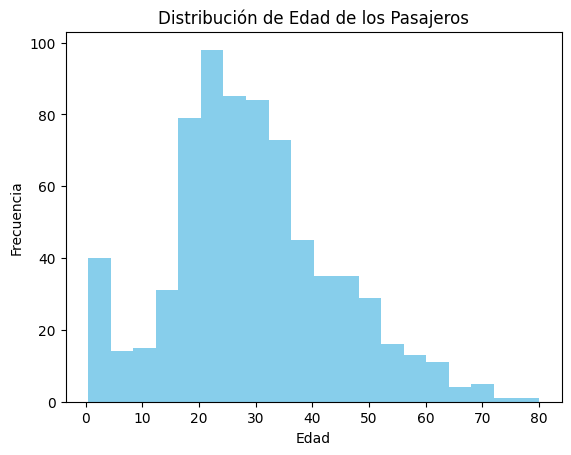

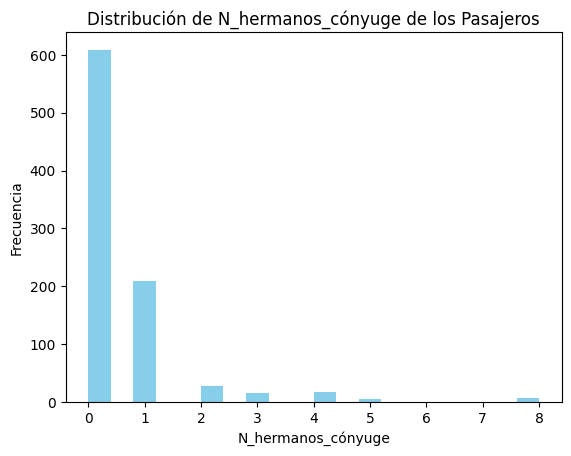

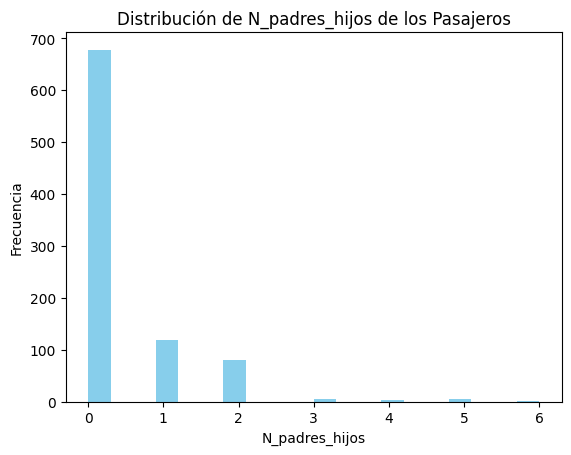

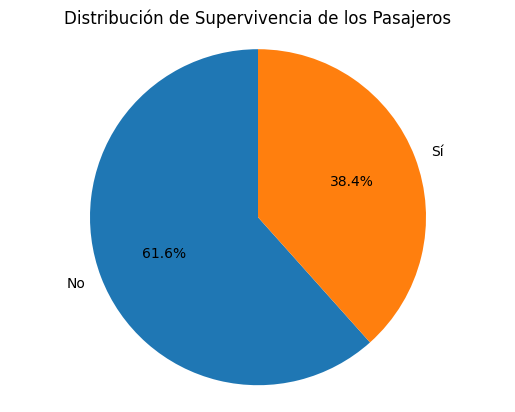

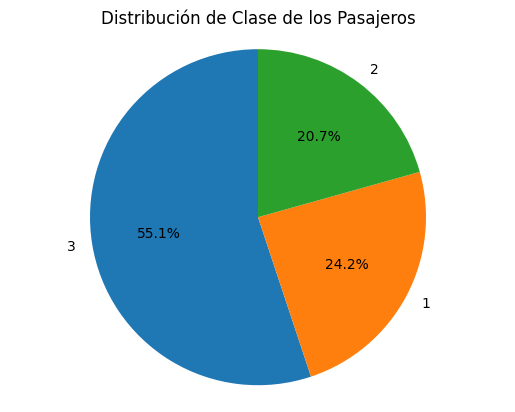

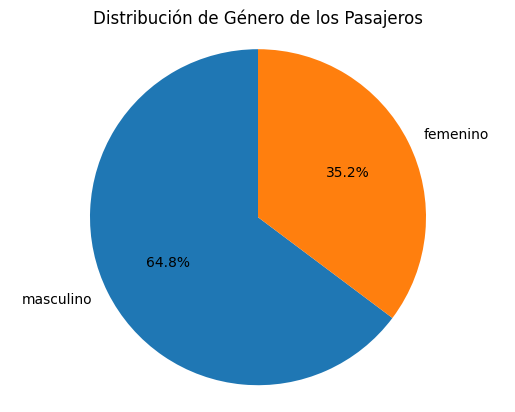

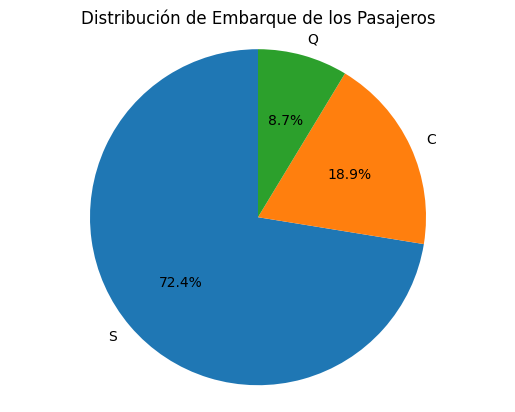

Esa opción no existe


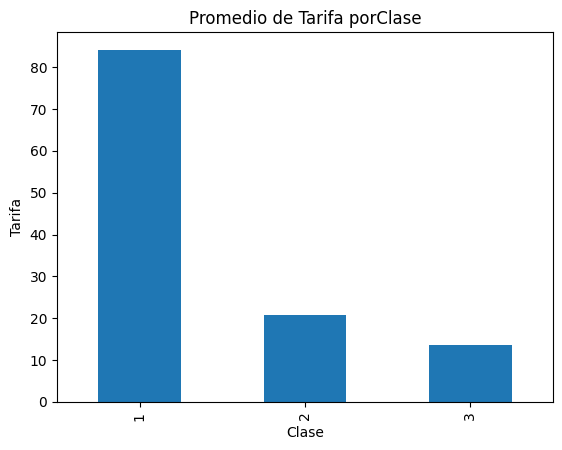

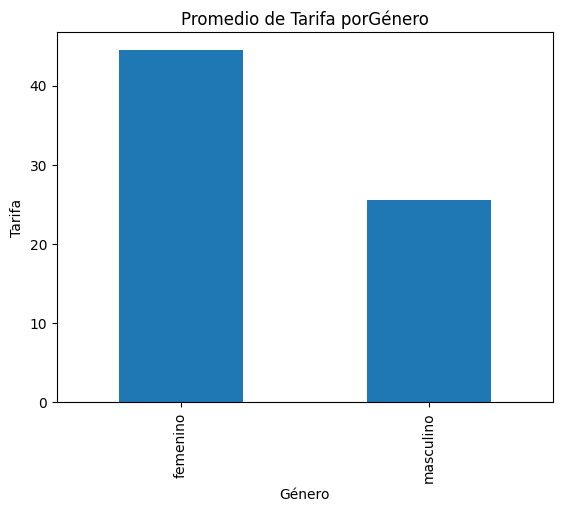

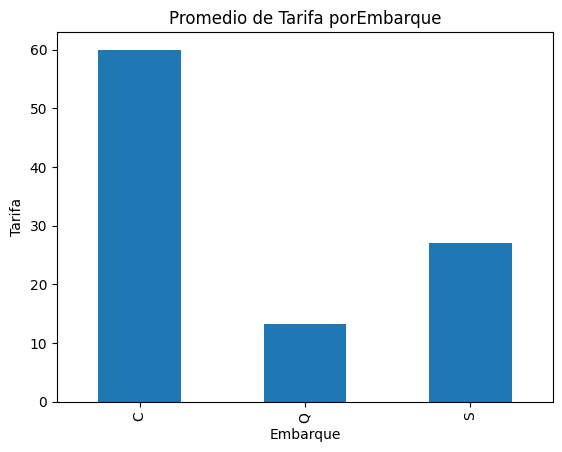

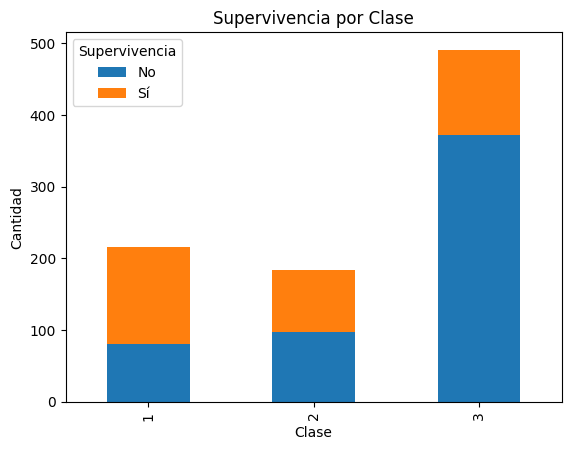

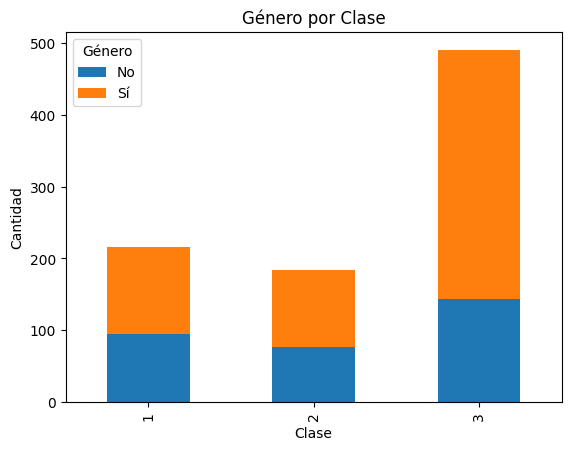

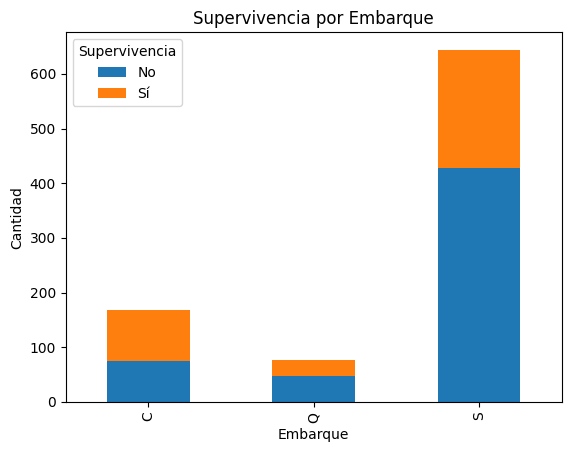

Esa opción no existe


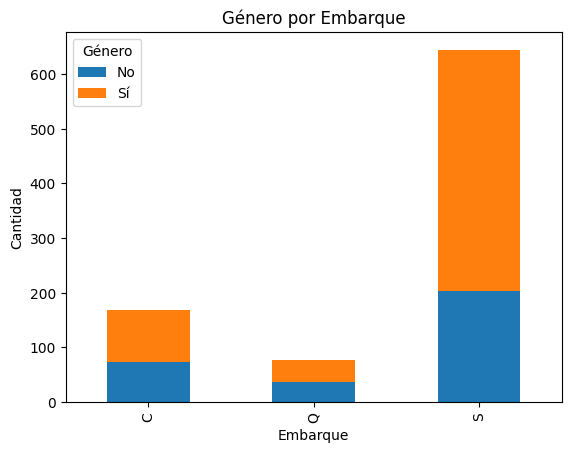

Esa opción no existe


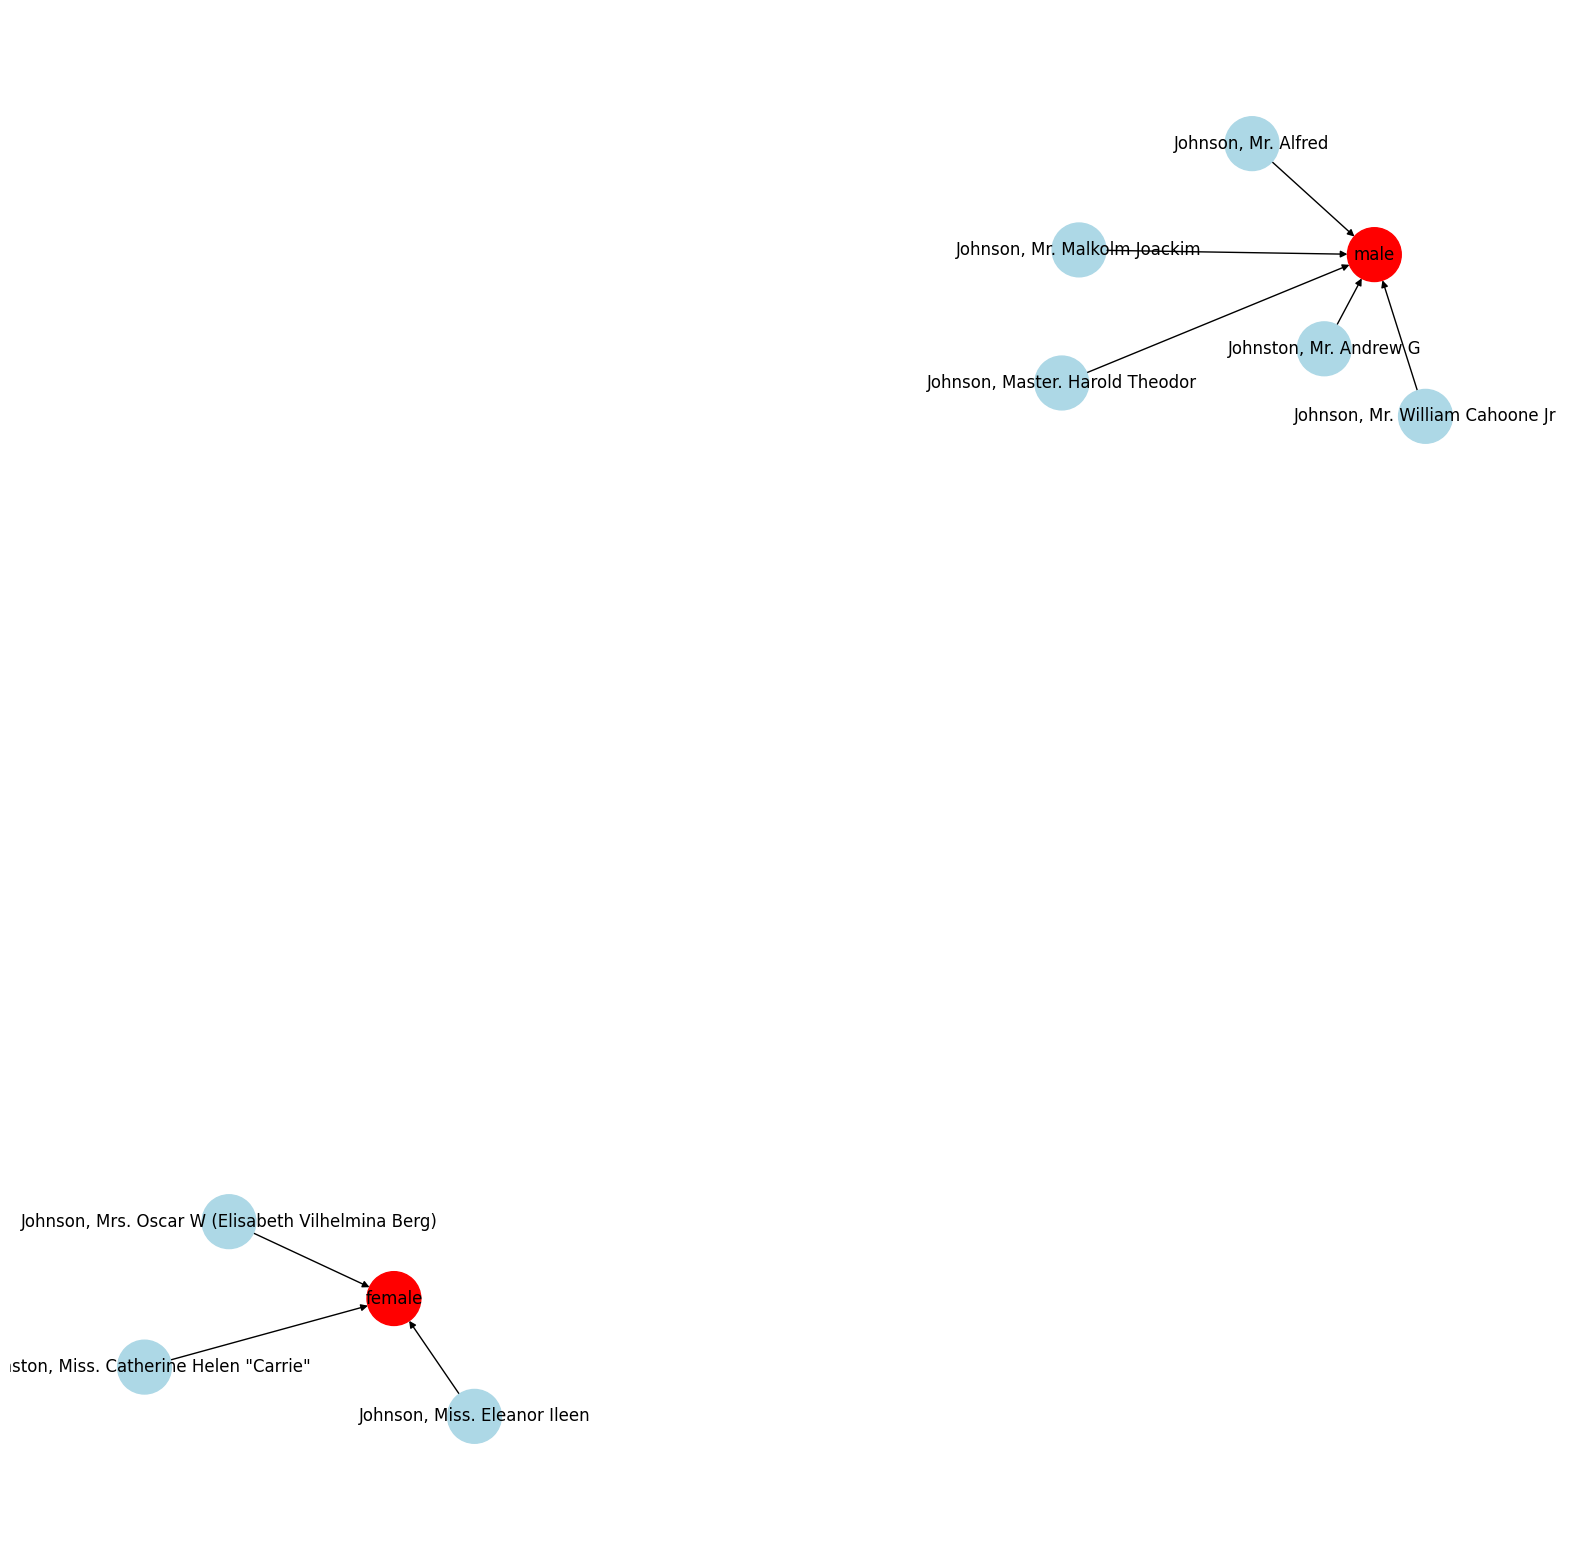

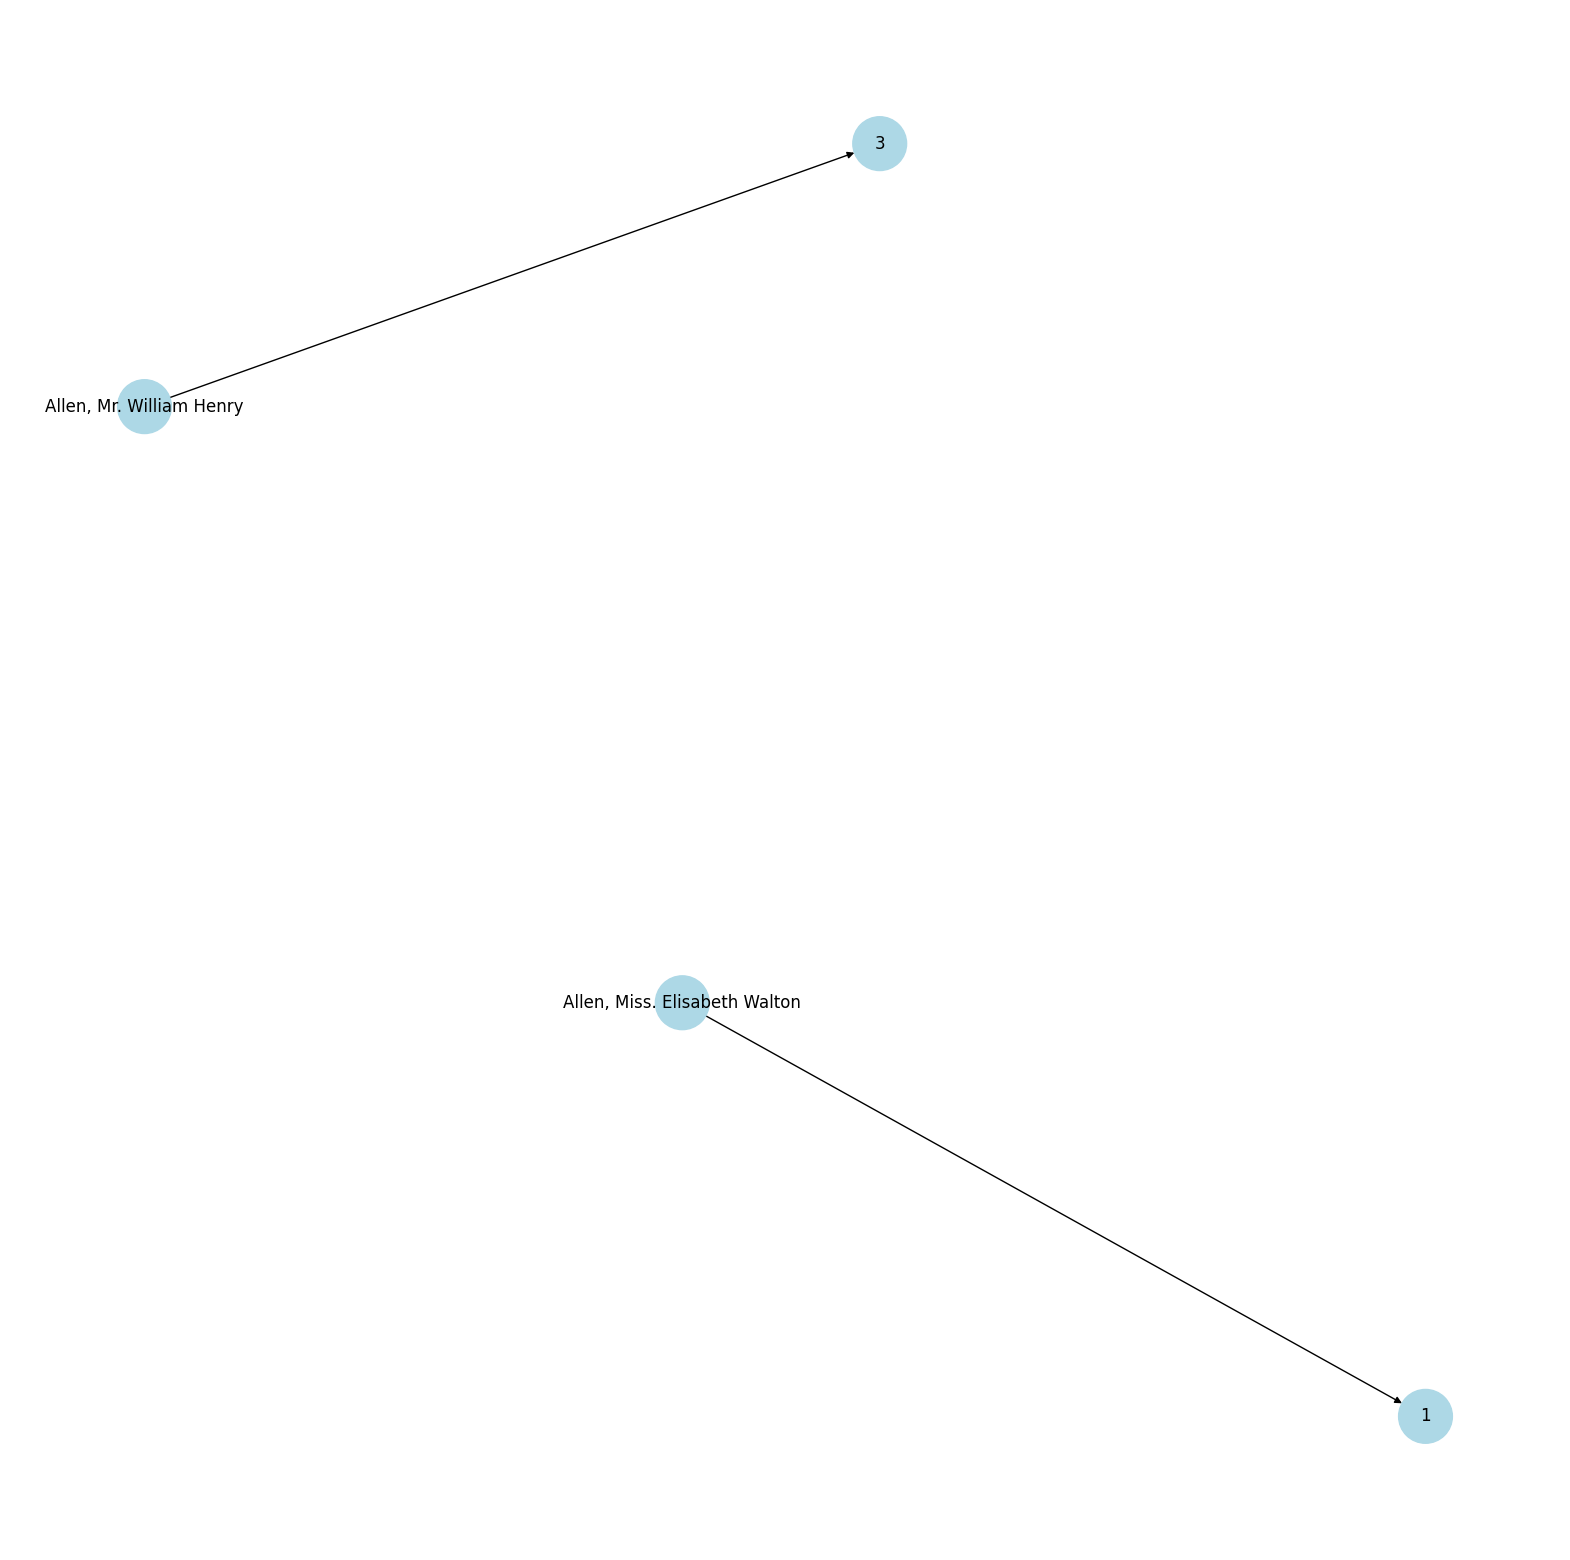

Error:No se encontraron registros para el apellido ^Mccarthy.* proporcionado


In [60]:
# Menú para el usuario

acceso_menu = True
while acceso_menu:
    menu_principal = int(input('Ingrese el número de la opción del menú que desee elegir:\n1. Generar un gráfico de frecuencia\n2. Generar un gráfico de torta\n3. Generar un promedio de la Tarifa por una variable\n4. Generar una diferencia \n5. Generar un grafo en base a un apellido\n0. SALIR'))

    if(menu_principal == 1): # Submenú Frecuencia
        variable = int(input('Frecuencia que desea generar:\n1. Edad\n2. Hermanos/cónyuges\n3. Padres/hijos'))
        if(variable == 1):
            frecuencia('Edad')
        elif(variable == 2):
            frecuencia("N_hermanos_cónyuge")
        elif(variable == 3):
            frecuencia("N_padres_hijos")
        else: print('Esa opción no existe')
    elif(menu_principal == 2): # Submenú Torta
        variable = int(input('Sobre qué desea hacer el gráfico de torta:\n1. Supervivientes\n2. Clase\n3. Género\n4. Embarque'))
        if(variable == 1):
            grafico_torta('Supervivencia')
        elif(variable == 2):
            grafico_torta("Clase")
        elif(variable == 3):
            grafico_torta("Género")
        elif(variable == 4):
            grafico_torta('Embarque')
        else: print('Esa opción no existe')
    elif(menu_principal == 3): # Submenú Promedio
        variable = int(input('Calcule el promedio de la TARIFA por una variable:\n1. Clase\n2. Género\n3. Embarque'))
        if(variable == 1):
            promedio('Clase')
        elif(variable == 2):
            promedio("Género")
        elif(variable == 3):
            promedio("Embarque")
        else: print('Esa opción no existe')
    elif(menu_principal == 4): # Submenú Diferencia
        variable1 = int(input('Categoría dentro de la cual diferenciar:\n1. Clase\n2. Embarque'))
        if(variable1 == 1):
            variable1 = 'Clase'
            variable2 = int(input('1. Supervivencia\n2. Género\nVariable a diferenciar:'))
            if(variable2 == 1):
                variable2 = 'Supervivencia'
                diferencia(variable1, variable2)
            elif(variable2 == 2):
                variable2 = 'Género'
                diferencia(variable1, variable2)
            else: print('Esa opción no existe')
        elif(variable1 == 2):
            variable1 = 'Embarque'
            variable2 = int(input('1. Supervivencia\n2. Género\nVariable a diferenciar:'))
            if(variable2 == 1):
                variable2 = 'Supervivencia'
                diferencia(variable1, variable2)
            elif(variable2 == 2):
                variable2 = 'Género'
                diferencia(variable1, variable2)
            else: print('Esa opción no existe')
        else: print('Esa opción no existe')
    elif(menu_principal == 5): # Submenú GRAFOS 
        menu_acceso = True
        while menu_acceso:
            Data = pd.read_csv('Titanic.csv')
            apellido = input('Ingrese el apellido que desea buscar:')

            menu = int(input('Elija el parámetro de búsqueda (número de la opción):\n1. Por género\n2. Por clase\n3. Por supervivencia\n4. Reiniciar la búsqueda\n0. SALIR'))

            if(menu == 1):
                generar_grafo_por_categoria(apellido, Data, 1)
            elif(menu == 2):
                generar_grafo_por_categoria(apellido, Data, 2)
            elif(menu == 3):
                generar_grafo_por_categoria(apellido, Data, 3)
            elif(menu == 4):
                print('Reiniciando búsqueda')
                menu_acceso = True
            elif(menu == 0):
                menu_acceso = False
            else: print('Esa opción no existe. Reiniciando búsqueda...')
    elif(menu_principal == 0): # SALIR
        acceso_menu = False
    else: acceso_menu = True